In [8]:
import pandas as pd
import re

def split_lu(x):
    items = re.split('[ |(|)|-]', x.strip())
    return float(items[0]), float(items[2]), float(items[-2])

metric = pd.read_csv('data/data.csv')
metrics = []
for idx, row in metric.iterrows():
    for cohort in metric.columns[2:]:
        m, l, u = split_lu(row[cohort])
        metrics.append([row['Survival'], row['Model'], m, cohort])
        metrics.append([row['Survival'], row['Model'], l, cohort])
        metrics.append([row['Survival'], row['Model'], u, cohort])
metrics = pd.DataFrame(metrics, columns=['Survival', 'Model', 'C-index', 'Cohort'])
metrics

,Survival,Model,C-index,Cohort
0,OS,Clinic,0.946,Training cohort
1,OS,Clinic,0.932,Training cohort
2,OS,Clinic,0.959,Training cohort
3,OS,Clinic,0.789,Internal validation cohort
4,OS,Clinic,0.762,Internal validation cohort
...,...,...,...,...
175,PFS,Clinic+MRI+WSI (Foundation model),0.724,External test cohort B
176,PFS,Clinic+MRI+WSI (Foundation model),0.802,External test cohort B
177,PFS,Clinic+MRI+WSI (Foundation model),0.793,External test cohort C
178,PFS,Clinic+MRI+WSI (Foundation model),0.754,External test cohort C


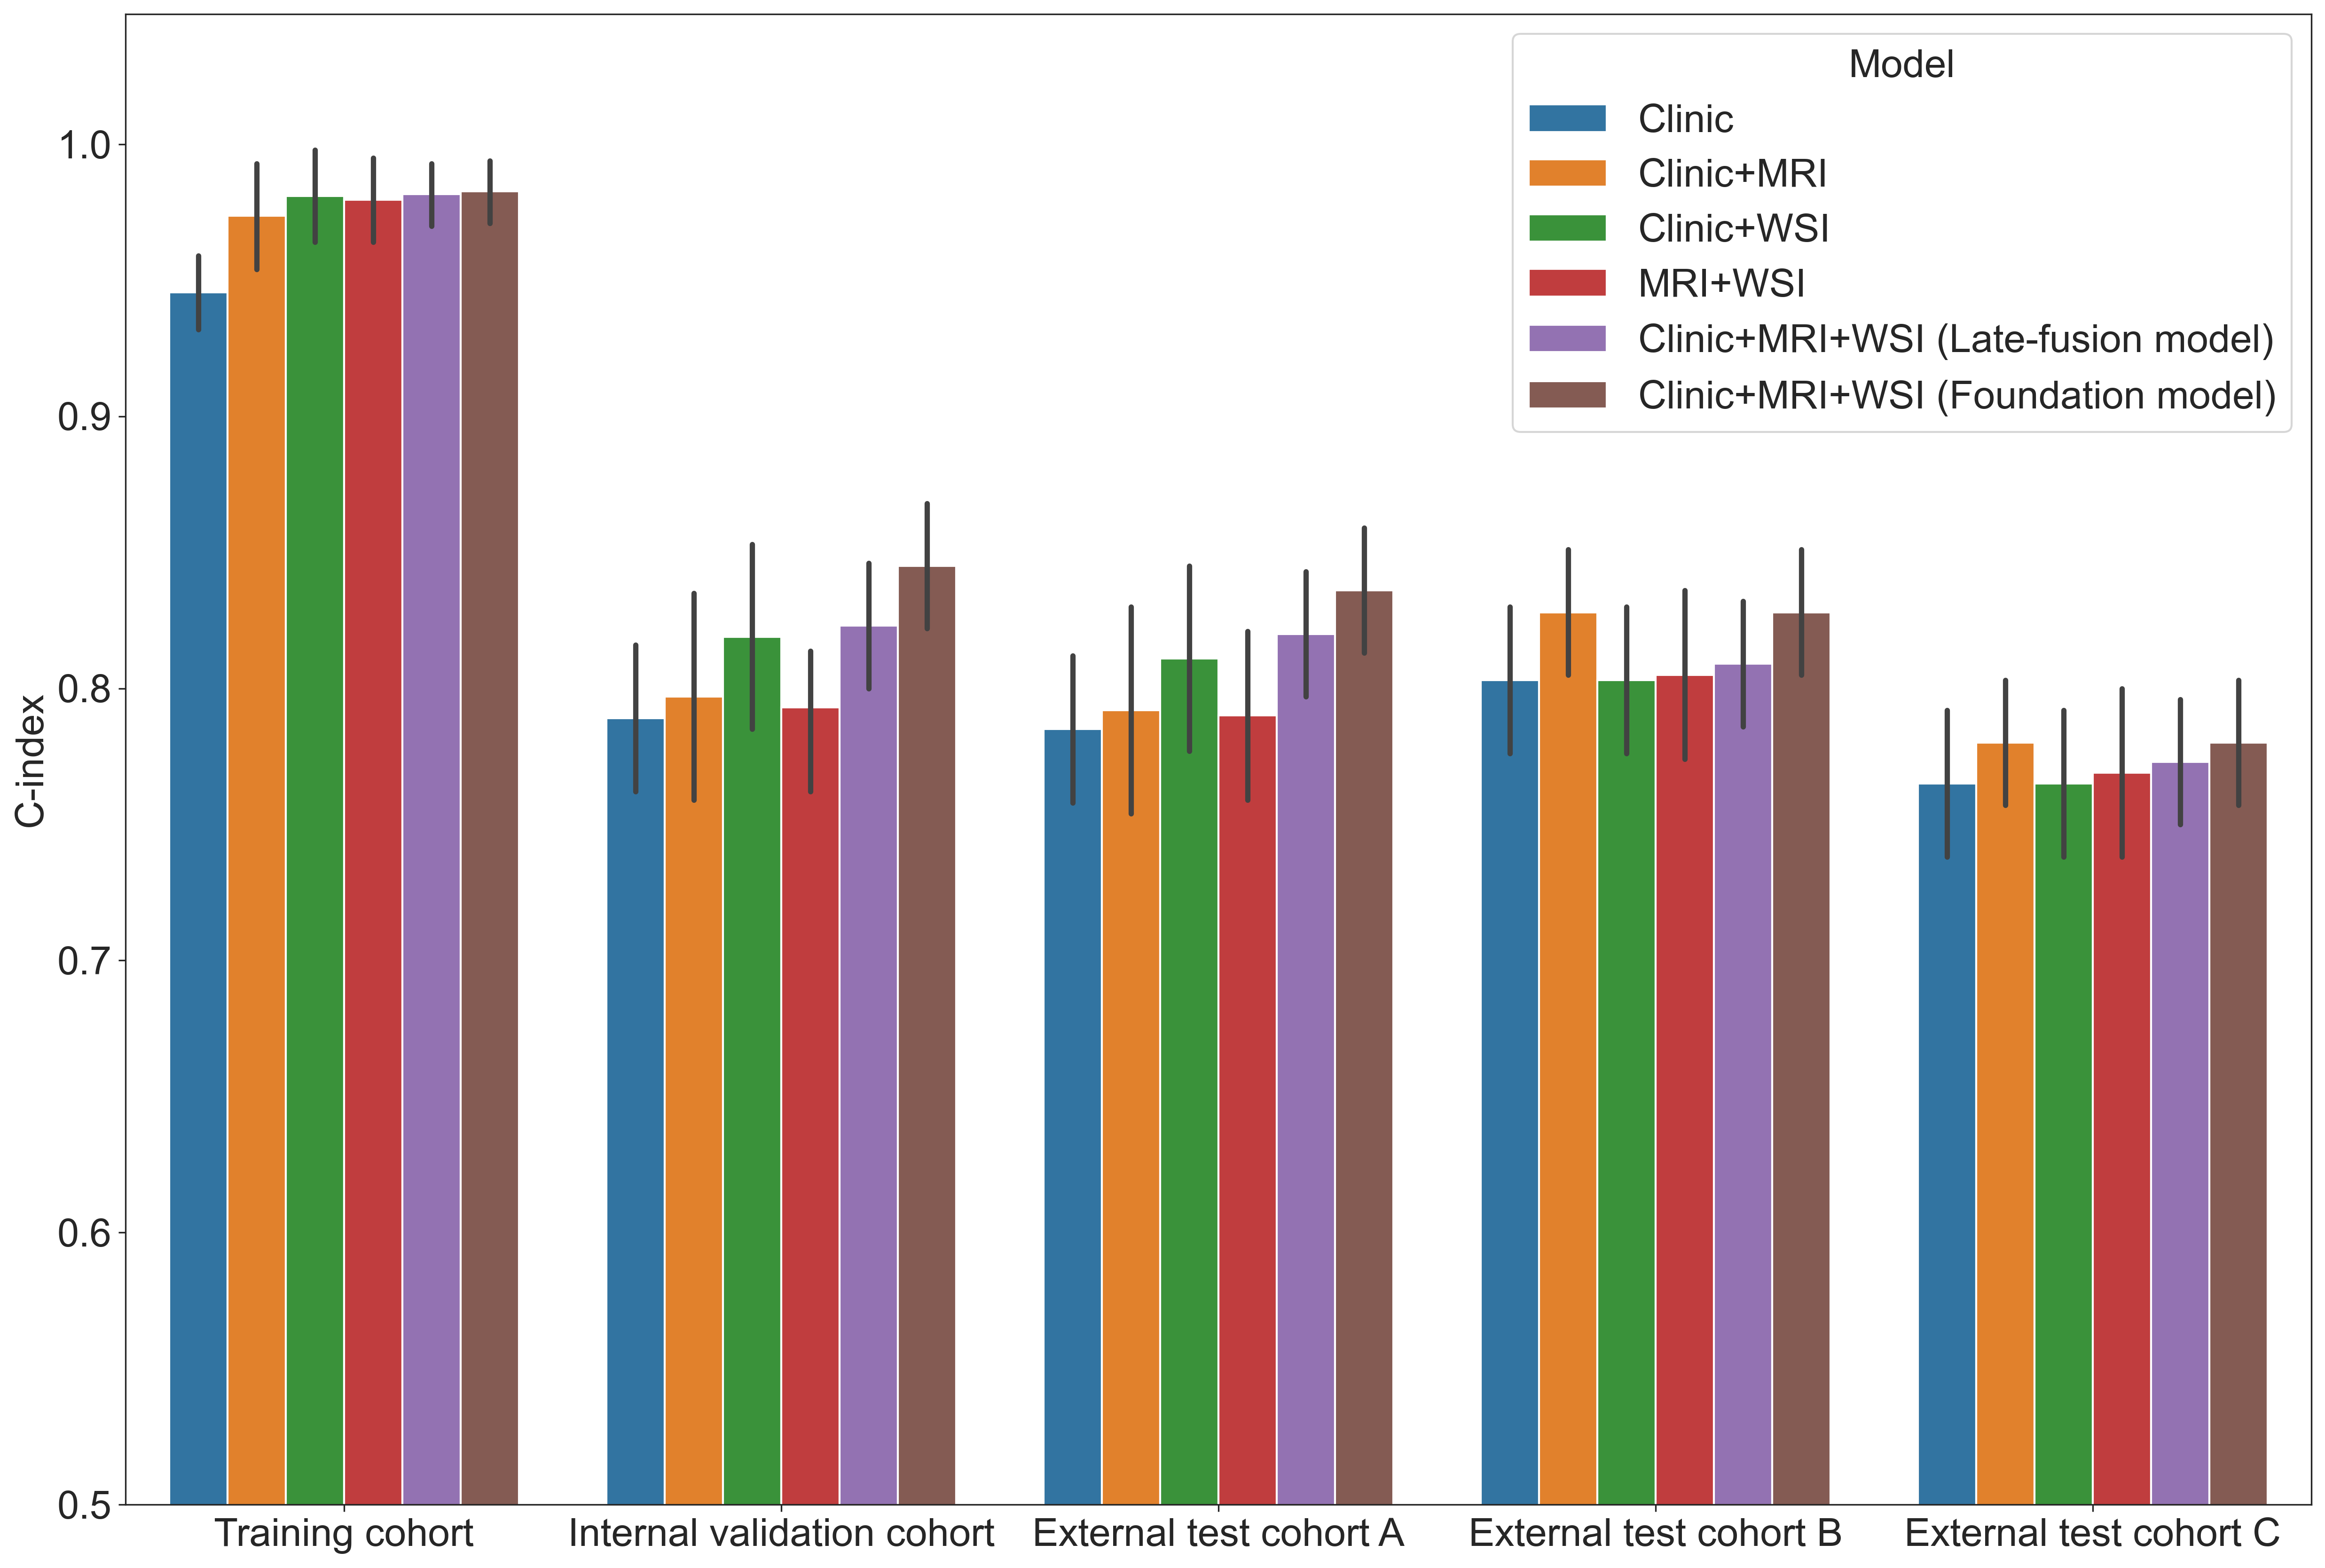

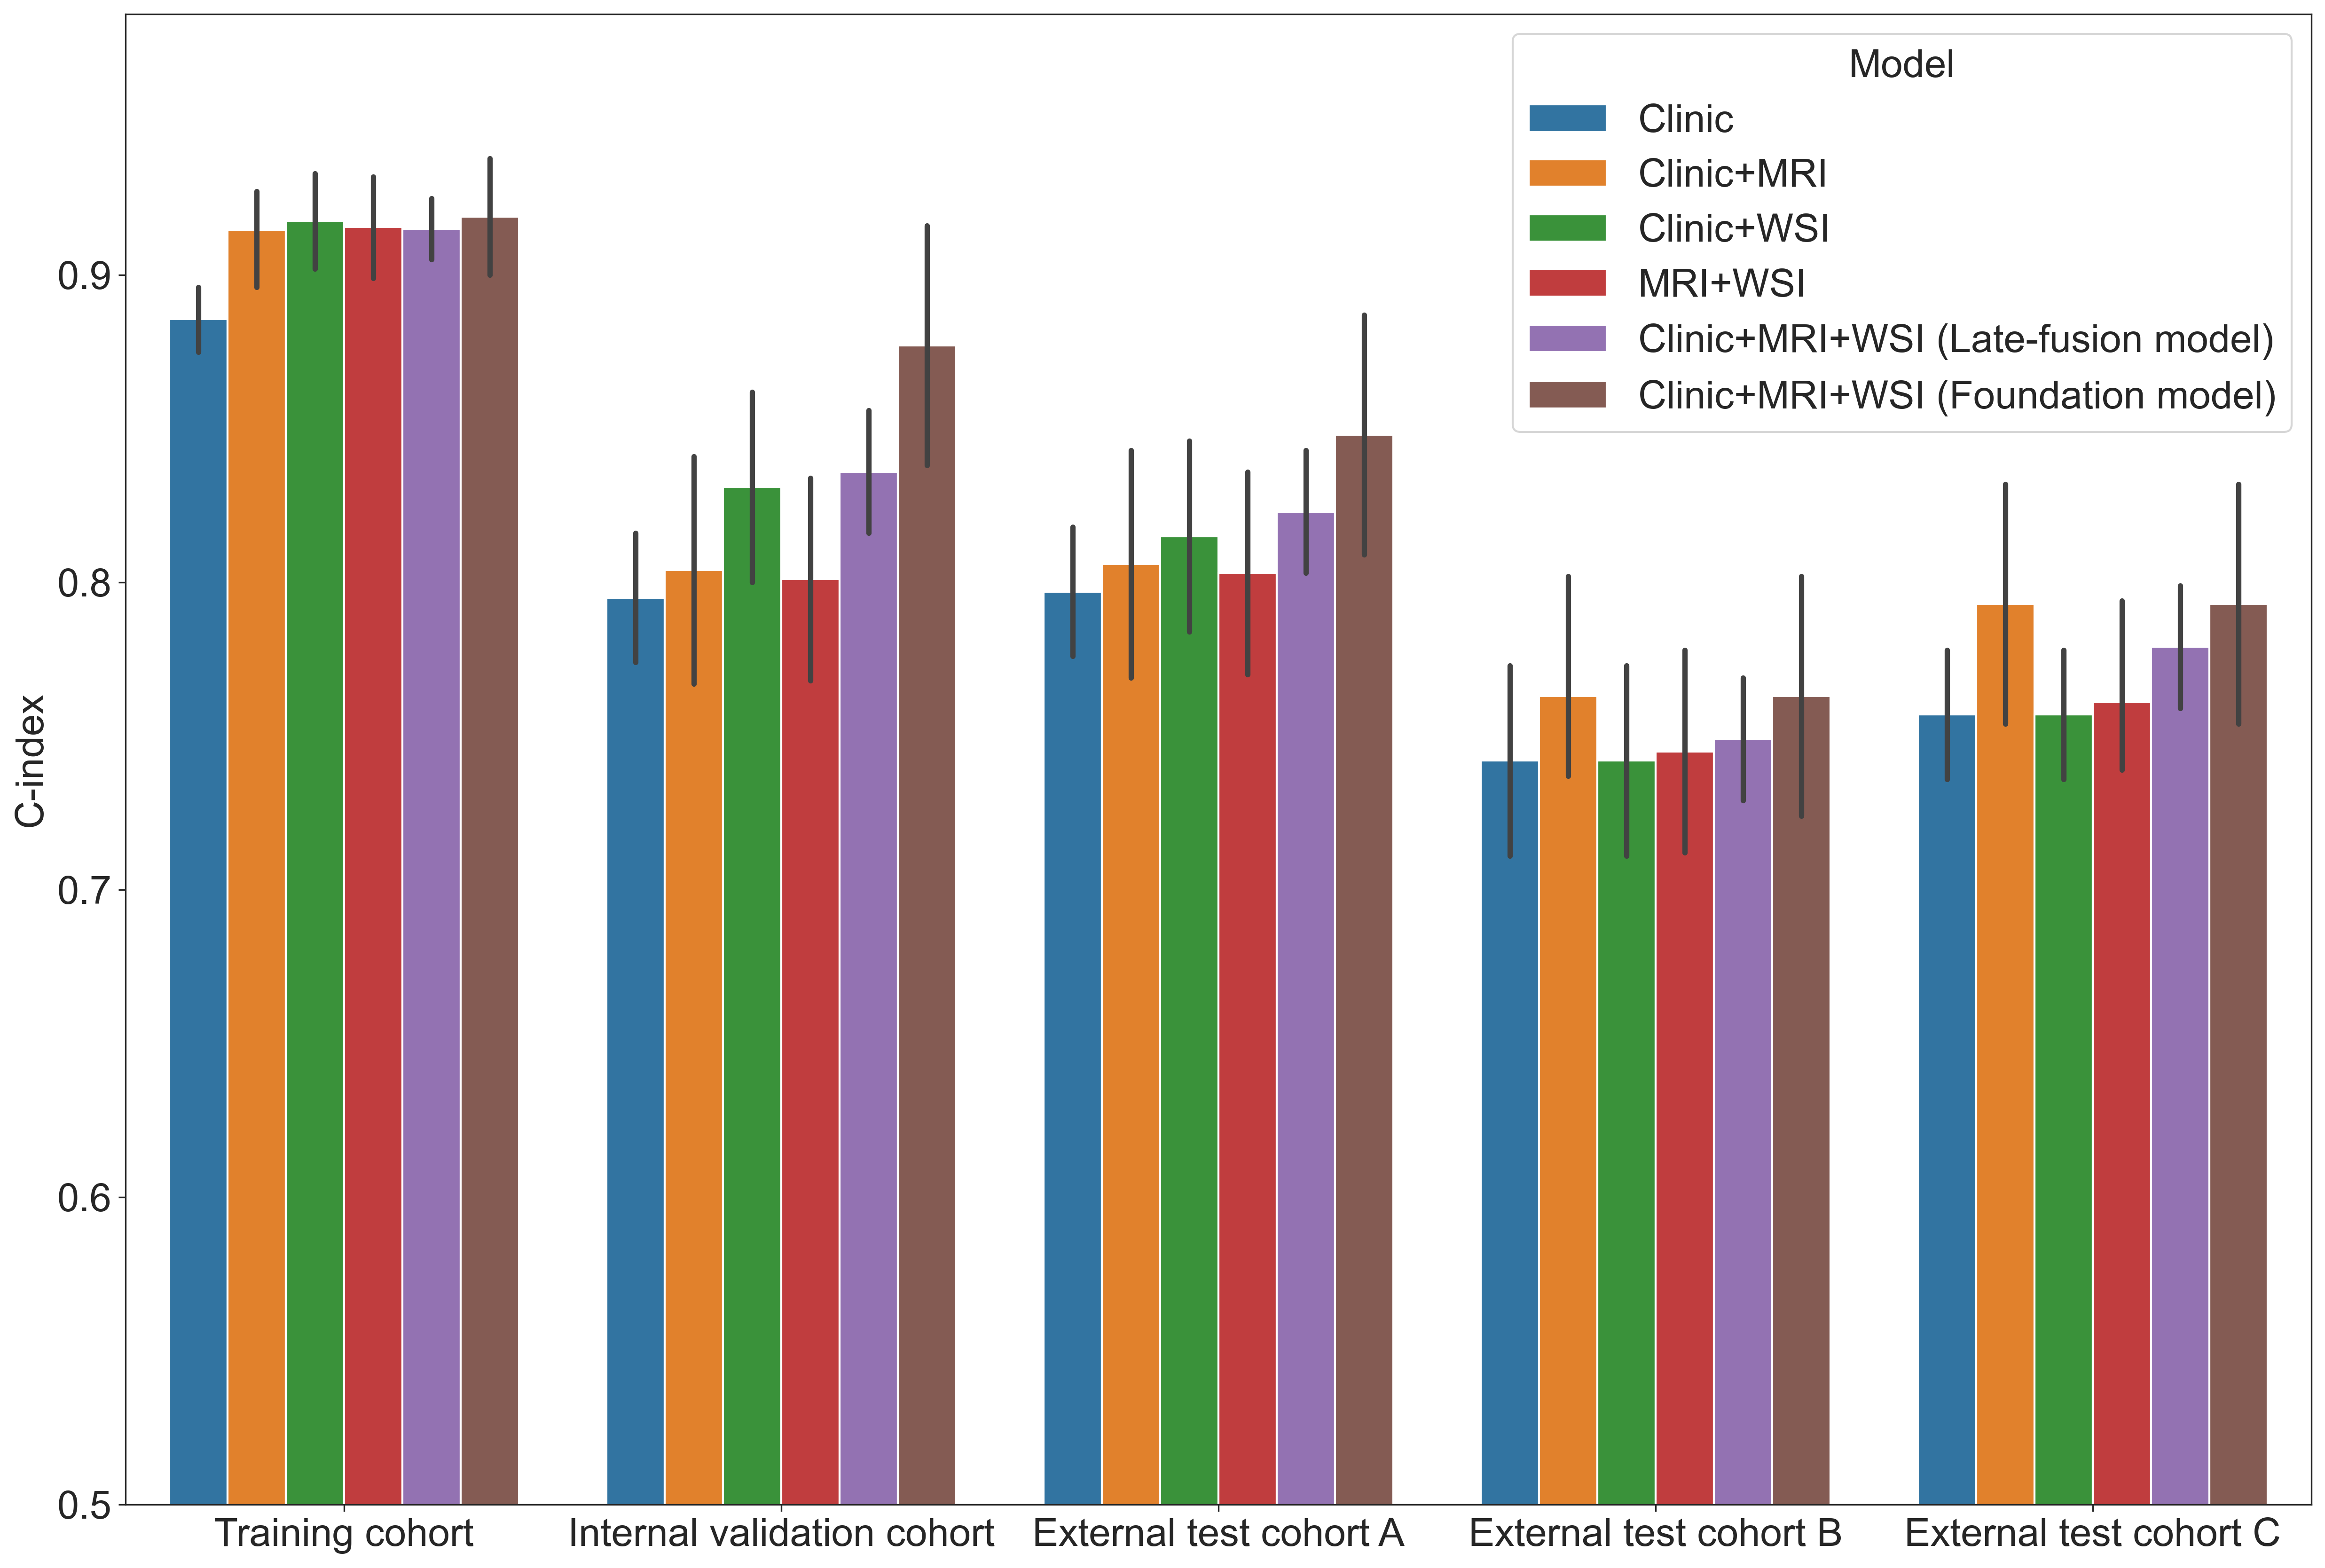

In [9]:
import seaborn as sns
from onekey_algo import init_CN
import matplotlib.pyplot as plt

init_CN()
# plt.rcParams['font.size'] = get_param_in_cwd('font.size', 20)

for sur in ['OS', 'PFS']:
    plt.figure(figsize=(20, 14))
    sns.set_style("ticks")
    subdata = metrics[metrics['Survival'] == sur]
    sns.barplot(x='Cohort', y='C-index', data=subdata, hue='Model')
    plt.ylim(0.5)
    plt.savefig(f'img/{sur}_ci_comparision.svg', bbox_inches='tight')
    plt.xlabel(None)
    plt.show()